# PySub Tutorial 1 - Calculating compaction and subsidence
Welcome to the first example case for building, running and displaying subsidence model using the PySub package, from an Excel template. 

This tutorial can be found in the folder "Example folder", in the folder where your PySub package has been installed:
.../python-subsidence/Examples

The tutorial assumes installation has been succesful and this Notebook is being run in an environment where PySub has been succesfully installed. The instalation instructions are available (.../python-subsidence/Documentation/Documentation.py). 

In this tutorial we are going to built a model from an example Excel file. The case we are studying is a fictional gas or liquid extraction for which we know the resulting presure drop. The goal is to familiarize you with the PySub model, it's syntax and functionality. For how to fill in the Excel work sheet, we divert you to this tutorial (.../python-subsidence/Documentation/Intructions Template SubsidenceModelGas.docx). In addition, we show some quick methods on how to display subsidence. 

The PySub modules used in this tutorial are: SubsidenceModelGas, plot_utils and memory

In tutorial 2, the subsidence will be determined from parameters related to excavating solid material and merging models. In tutorial 3 we will will go into how to work with some more advanced variables (slope, rate, etc.) and how to adjust plots. 

Notes:
- For now the files in this example are stored on the TNO-AGE server, so make sure you are connected!

## PySub in action
In below cell, an example is given of PySub code where the subsidence is determined and relevant data displayed. After running this cell, we will run through each line and discuss the methods used.

Loading SubsidenceModel from Example gas.xlsx
Building model...
Model built!


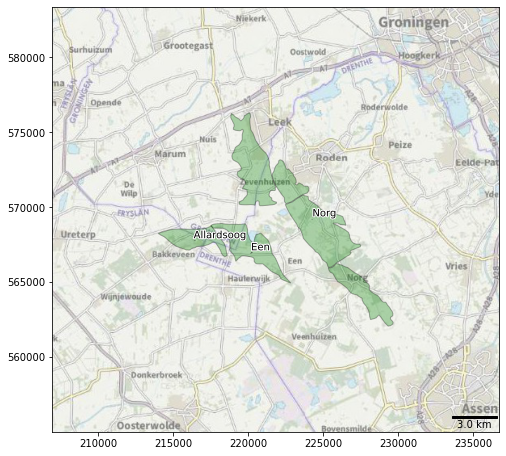

Calculating compaction, model: Tutorial 1
Calculated compaction, model: Tutorial 1


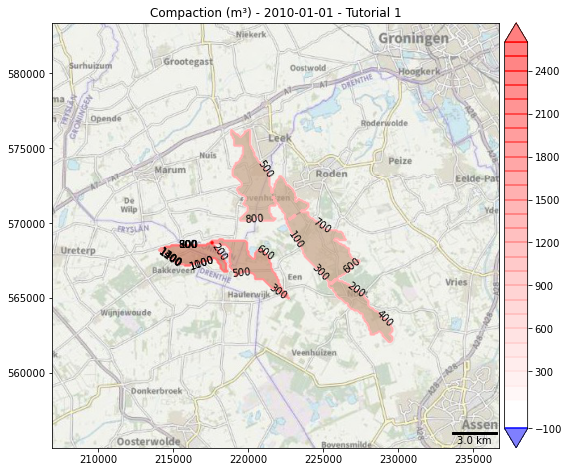

Calculating subsidence, model: Tutorial 1
Calculated subsidence, model: Tutorial 1


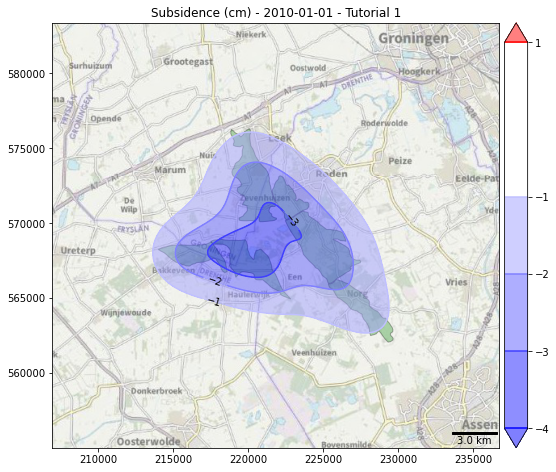

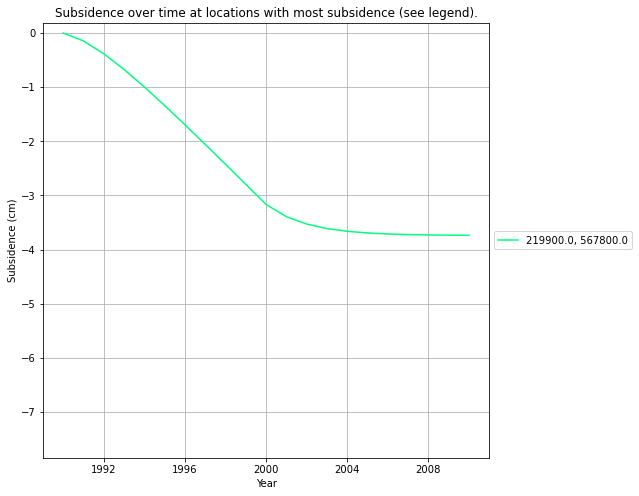

Model Tutorial 1 saved at C:\Users\davidsb\python-subsidence\PySub\Tutorials\Tutorial 1\save\Tutorial 1.smf


In [1]:
import os

import_path = "Example gas.xlsx"
project_folder = os.getcwd()

from PySub.memory import build_model, save
from PySub import plot_utils as plot

Model = build_model(import_path, 
                    name = 'Tutorial 1', 
                    project_folder = project_folder)

plot.plot_reservoirs(Model)

Model.calculate_compaction()
plot.plot_subsidence(Model, variable = 'compaction', unit = 'm', contour_steps = 100)

Model.calculate_subsidence()

plot.plot_subsidence(Model)
plot.plot_timeseries(Model, mode = 'max')

save(Model)

## Loading a model from Excel

First, we need a filled Excel template (see .../python-subsidence/Documentation/Instruction Templates.docx) to import a model. With the function build_model we can import Excel files and any other supported files (JSON) as SubsidenceModel objects.

Another important aspect of building the model is the project folder. The project folder will store temporary files, exported models, printed figures and other exported data. For now we use the current folder (where this notebook is stored in).

In the first three lines we define where the Excel file and project folder are. The Excel file is being referenced as a relativa path, not an absolute path

In [5]:
import os

import_path = "Example gas.xlsx"
project_folder = os.getcwd()

Remember to use the "r" in front of a string when the path has single backslashes and not double backslashes (or forward backslashes on Linux or Apple).

Before we can use the build_model function, we need to import it from the memory module from PySUb. The memory model stores functions that relate to importing and exporting data. Because we want to import and store the model, we load both build_model and save.

In [6]:
from PySub.memory import build_model, save

With any of the functions from this module, it can be useful to use their help function: 

In [7]:
help(build_model)

Help on function build_model in module PySub.memory:

build_model(import_path, name=None, project_folder=None)
    Build a model from the Excel template.
    
    Parameters
    ----------
    import_path : str
        Path to an input file.
    name : str
        Name of the model.
    project_folder : str, optional
        Path to a directory for the model input and results to be saved in. The default 
        is None. If the project_folder parameter is None, nothing will be saved.
        
    Returns
    -------
    model : SubsidenceModel



The variables "name" and "project_folder"are optional. When not specified or specified to "None" the Model name will be the same as the name of the Excel file and the project folder will be set to None. When the project folder is None, no data will be saved and any attempts to save them are met with a warning.

In [8]:
Model = build_model(import_path, name = 'Tutorial 1', project_folder = project_folder)

Loading SubsidenceModel from \\tsn.tno.nl\Data\sv\sv-069554\Kluis\Lop_Proj_2021_EZK\B12_KEM16\WP4\Exampe input\Input example time-decay.xlsx
Building model...
Model built!


The Model has been built automatically and is now ready to perform specific calculations on. The Model variable here is of type SubsidenceModel object from the SubsidenceModelGas module.

## Our Model
The model we have imported consists of 3 reservoirs. We can have a look at these reservoirs:

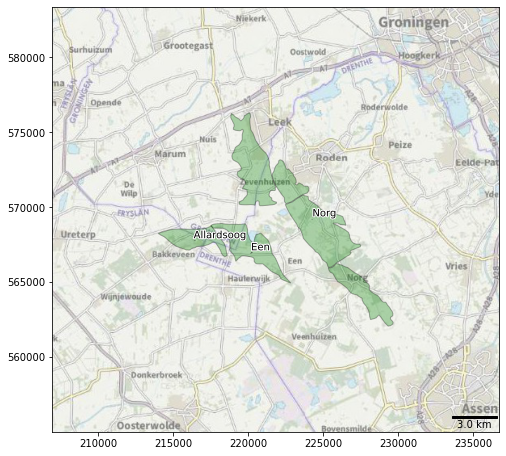

In [9]:
plot.plot_reservoirs(Model)

We see three reservoirs for which the pressure drop and geomechanical parameters are defined in the Excel file. The pressure is distributed uniformly over the reservoir (as the Excel file is filled in as it is currently), which should be kept in mind when calculating the compaction that this pressure drop causes.

## Calculate compaction

In this example, the subsidence is caused by a pressure drop in the reservoir. This pressure drop causes compaction of the reservoir rock which in turn causes the subsidence. Because other causes of subsidence can be determined (see tutorial 2) the compaction is calculated seperately:

In [10]:
compaction = Model.calculate_compaction()

Calculating compaction, model: Tutorial 1
Calculated compaction, model: Tutorial 1


The method calculate_compaction returns a compaction variable, which is an xarray DataArray object. It stores the resulting compaction in the Model object too, as: Model.compaction. In the first code cell, this returned value is therefore omitted, bit here we want to have a closer look at the items it returns.

To learn how to work with xarrays, check out their [tutorials page](https://xarray.pydata.org/en/stable/tutorials-and-videos.html).

Some simple functionality for selecting coordinates (.sel), summing (.sum) and plotting (.plot) is shown here to visualize the compaction. We select a timestep by its label and sum all the values over the reservoirs to subsequently plot the compaction in meters over the entire model at the final timestep.

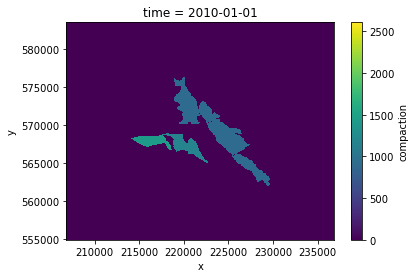

In [11]:
Model.compaction.sel(time = '2010-01-01').sum(dim = 'reservoir').plot()

A PySub native method also exists for plotting this:

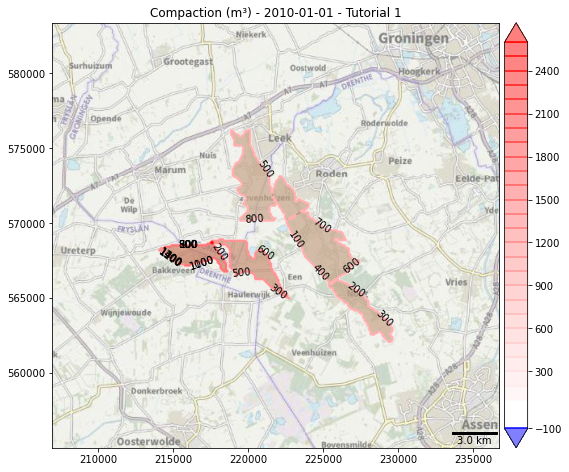

In [12]:
from PySub import plot_utils as plot
plot.plot_subsidence(Model, variable = 'compaction', unit = 'm', contour_steps = 100)

The reservoirs clearly outline the compaction, indicating the uniform pressure distribution. All spatial units in the model are stored in meters. You can set the spatial unit in this function. The default is cm!

## Calculate subsidence

Using this compaction, we can now determine the effect this compaction has on the surface above the reservoirs.

In [13]:
Model.calculate_subsidence();

Calculating subsidence, model: Tutorial 1
Calculated subsidence, model: Tutorial 1


The subsidence has been stored in the Model object and is being returned as an xarray DataArray. The subsidence is calculated for each reservoir and over all timesteps. 


## Making subsidence contour plots
To visualize the subsidence, the PySub package has the additional module plot_utils (here imported as plot):

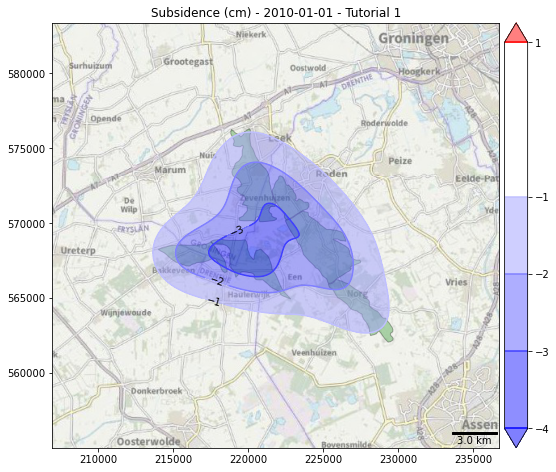

In [14]:
plot.plot_subsidence(Model)

Note that the subsidence is only printed at the final timestep, and with the subsidence caused by mutliple reservoirs superimposed over eachother. The data is shown in cm, whereas the subsidence results are stored in m.

To plot the subsidence at a specified timestep, use the time argument in the plot_subsidence function:

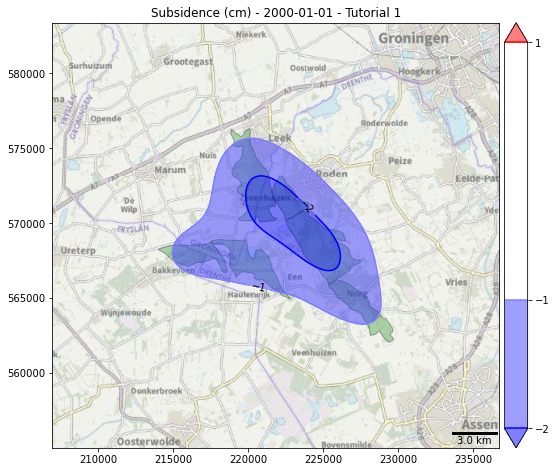

In [15]:
plot.plot_subsidence(Model, time = '2000-01-01')

To plot the subsidence caused by a specific reservoir, use the reservoir argument. The units the data is shown in, can be adjusted using the unit argument. The default is in 'cm'. To change the unit of the plotted date change the unit argument to, for instance, 'mm': 

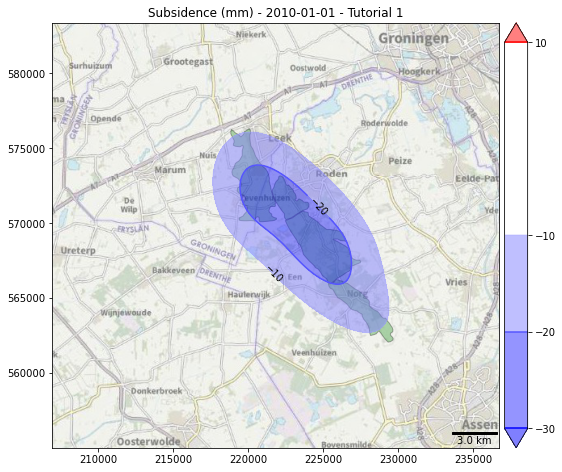

In [16]:
plot.plot_subsidence(Model, time = '2010-01-01', reservoir = 'Norg', unit = 'mm')

## Making subsidence timeseries

Several options for timeseries and determining the subsidence at a location are available. Here we show the timeseries at the deepest point in the subsidence bowl, made easily accessible by setting mode to 'max' in the function plot_timeseries:

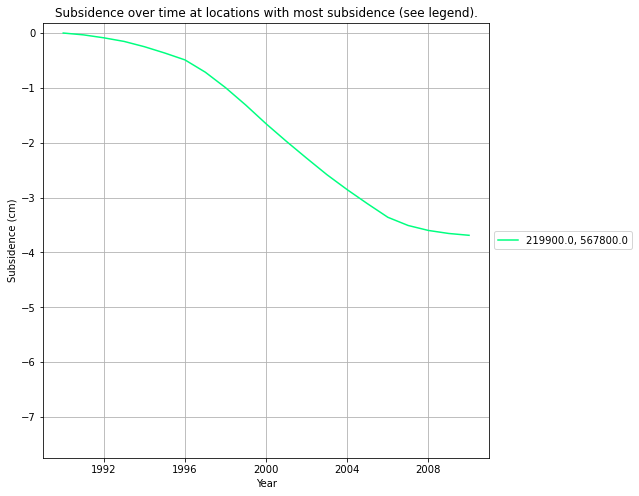

In [17]:
plot.plot_timeseries(Model, mode = 'max')

The location of the deepest point is given in the legend of this type of figure.

To get the value of the maximum subsidence, and its location, run the following method:

In [20]:
max_subsidence, (x, y) = Model.get_max_subsidence()
print(f'Maximum subsidence: {max_subsidence: .3f} m')
print(f'X                 : {x}')
print(f'Y                 : {y}')

Maximum subsidence: -0.037 m
X                 : 219900.0
Y                 : 567800.0


# Making cross sections
When one wants to see a cross-section (or sideview) of the subsidence bowl, a cross-section can be shown. There are two functions to show cross section, one that only shows the total subsidence (plot.plot_cross_section) and another to show the individual contribution to the overlap (plot_overlap_cross_section).

First you have to define a line: 

In [28]:
line = {'A': (208281, 565892), 
        'B': (221492, 568094), 
        'C': (227096, 573965)}

Sometimes it is easier to just click and draw and not have to go to another program to look this up, so there is a function to this in the same environment as PySub. Remove the # below to try:

In [29]:
# line = plot.ask_for_line(Model)

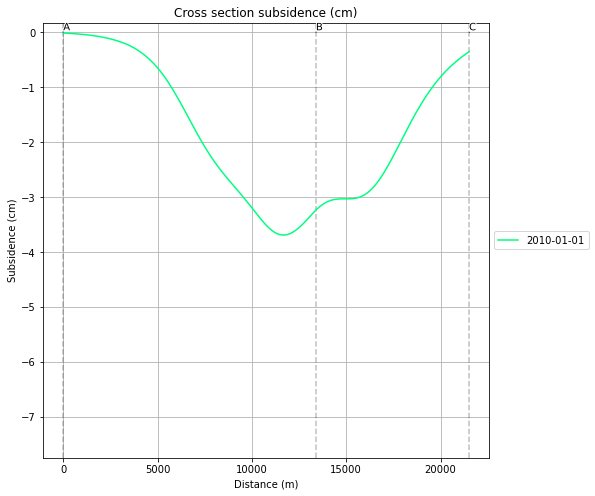

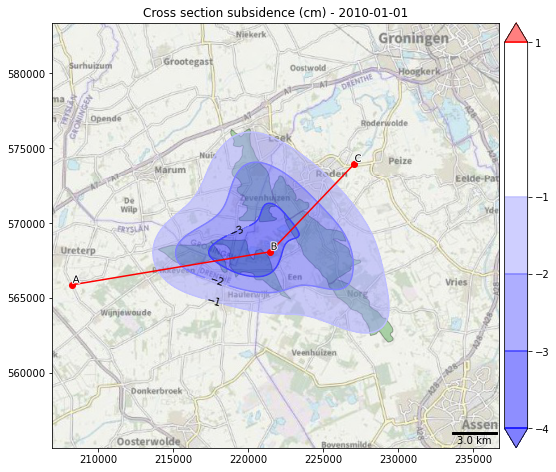

In [32]:
plot.plot_cross_section(Model, line)

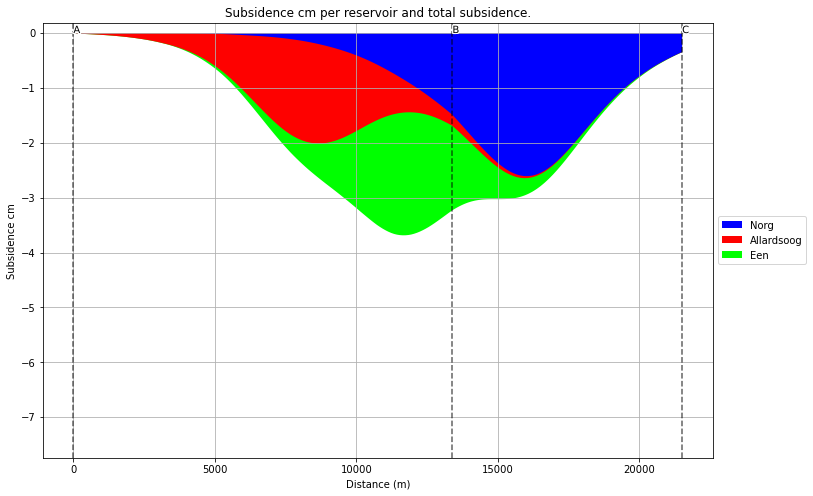

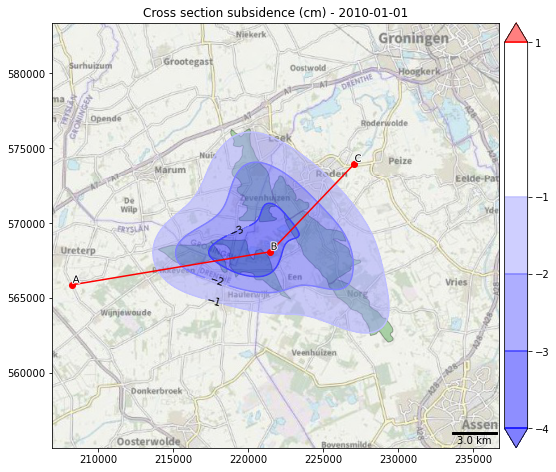

In [31]:
plot.plot_overlap_cross_section(Model, line)

## Saving
The Model now has plenty of interesting data, which will not be stored when closing this python kernel. To not let all of the computers hard work go to waste, we can save and export the Model and data.

Saving the model is easiest with the save function, available from the memory module. In the memory module, the functions load is also available.

For now, we are going to save the model in your current working directory:

In [ ]:
from PySub.memory import save, load

save(Model)

As you can see, the file is stored in the project_folder, in the folder save, under the name of the model. To load the model, use the load function:

In [ ]:
path = r'Tutorial 1\save\Tutorial 1.smf'
loaded_model = load(path)

In [ ]:
plot.plot_subsidence(loaded_model)

Now we can use the Excel file to calculate and show the basics of subsidence caused by fluid or gas extraction from deep reservoirs. In tutorial 2 this model will be used again to merge with a model where the subsidence is caused by salt extraction. 